In [280]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import scipy

In [109]:
#Example 30.3 (Estimating DC Level)

N = 200
pio = 2
sigma_v_sq = 0.01

xo = np.sqrt(pio)*np.random.rand()

y = xo*np.ones(N) + np.sqrt(sigma_v_sq)*np.random.randn(N)
dc_value = xo*np.ones(N)

aux = 0
snr = pio/sigma_v_sq
hat_x = []

for n in range(N):
    hat_x.append(aux)
    b = 1/((1/snr)+n+1)
    a = ((1/snr)+n)*b
    aux = a*aux + b*y[n]

hat_x = np.array(hat_x)

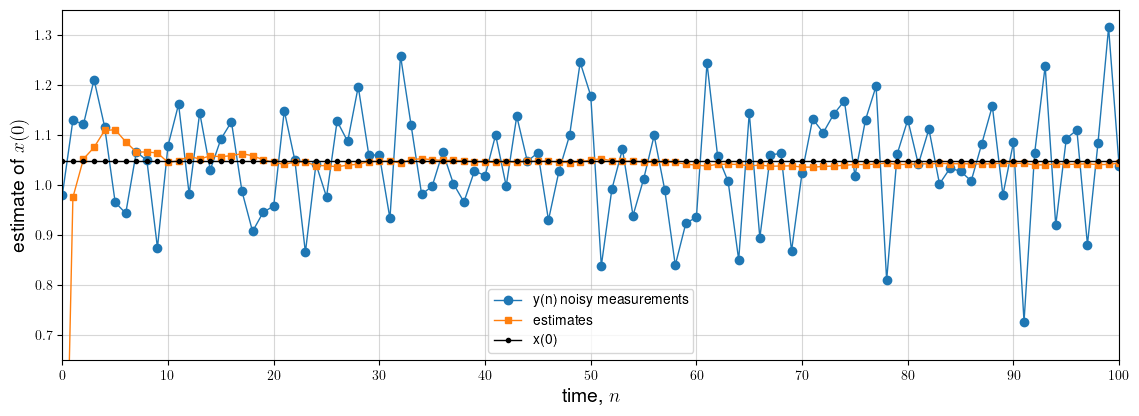

In [111]:
#figure 2 (DC level)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=30, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.plot(range(N), y, marker="o", linewidth=1, label="y(n) noisy measurements")
ax.plot(range(N), hat_x, marker="s", linewidth=1, markersize=4, label="estimates")
ax.plot(range(N), dc_value, marker="o", color="black", linewidth=1, markersize=3, label="x(0)")
ax.set_xlabel(r'time, $n$', fontsize=14)
ax.set_ylabel(r'estimate of $x(0)$', fontsize=14)
ax.set_ylim([0.65, 1.35])
ax.set_xlim([0, 100])
plt.xticks(np.arange(0, 110, 10))
ax.grid(alpha=0.5)
ax.legend()


plt.show()

In [459]:
#Run Example 5 (Tracking a moving target)

N = 420
T = 0.01
g = 10

F = np.array(
    [
        [1, 0, T, 0],
        [0, 1, 0, T],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

xo = 1
yo = 30
theta = np.pi/3
v = 15 #initial speed

vxo = v*np.cos(theta)
vyo = v*np.sin(theta)

variance_w = 0.3
R = variance_w*np.eye(2)
Pio = np.eye(4)

n = np.arange(0, 420, 1)
vx = vxo*np.ones(N)
vy = vyo*np.ones(N) - g*T*n
x = xo + vxo*n*T
y = yo + vyo*n*T - 0.5*g*(n*T)**2

z = np.array([
    x+np.sqrt(variance_w)*np.random.randn(N),
    y+np.sqrt(variance_w)*np.random.randn(N)
])


hat_x = np.zeros((4, N))
P = Pio
e = np.zeros((2, N))
d = -g*T*np.array([0, 0, 0, 1])

for n in range(N-1):
    Re = R + H@P@H.T
    Kp = F@P@H.T@np.linalg.inv(Re)
    e[:, n] = z[:, n] - H@hat_x[:, n]
    hat_x[:, n+1] = F@hat_x[:, n] + Kp@e[:, n] + d
    P = F@P@F.T - Kp@Re@Kp.T


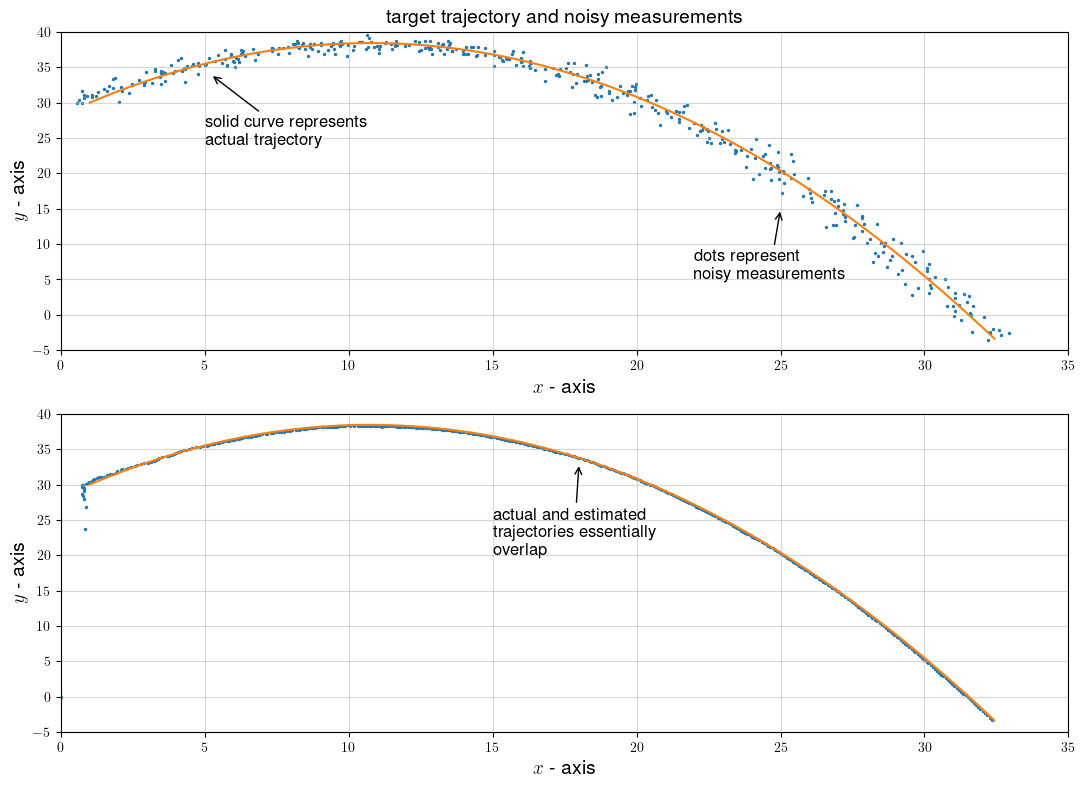

In [460]:
#Figure 4

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13,5
fig = plt.figure()

plt.subplots_adjust(bottom=0.1, top=1.5)

ax = fig.add_subplot(211)
ax.scatter(z[0], z[1], s=2)
ax.plot(x, y, color="tab:orange")
ax.set_xlabel(r'$x$ - axis', fontsize=14)
ax.set_ylabel(r'$y$ - axis', fontsize=14)
ax.set_ylim([-5, 40])
ax.set_xlim([0, 35])
plt.xticks(np.arange(0, 40, 5))
ax.set_title("target trajectory and noisy measurements", fontsize=14)
ax.grid(alpha=0.5)

ax.annotate("solid curve represents \n actual trajectory", xy=(5.2, 34), xytext=(5, 24), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')
ax.annotate("dots represent \n noisy measurements", xy=(25, 15), xytext=(22, 5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')

ax = fig.add_subplot(212)
ax.scatter(hat_x[0], hat_x[1], s=2)
ax.plot(x, y, color="tab:orange")
ax.set_xlabel(r'$x$ - axis', fontsize=14)
ax.set_ylabel(r'$y$ - axis', fontsize=14)
ax.set_ylim([-5, 40])
ax.set_xlim([0, 35])
plt.xticks(np.arange(0, 40, 5))
ax.grid(alpha=0.5)

ax.annotate("actual and estimated \n trajectories essentially \n overlap", xy=(18, 33), xytext=(15, 20), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')

plt.show()

In [591]:
#Example 10 (Tracking a moving object in 2D)
#Simulating EXTENDED KALMAN FILTERS (EKF, UKF)
#These filters do not always work

M = 4 #state dimension
N = 100 #time horizon

# x0 ~ N(x0_bar,Pi_0); initial state vector

x0_bar = np.array([0, 0, 0.2, -0.1]).reshape(-1, 1) #mean
Pi_0 = np.eye(M) #initial state covariance
Pi_0[0, 0] = 0.1
Pi_0[1, 1] = 0.01
Pi_0[2, 2] = 0.1
Pi_0[3, 3] = 0.01

#State-Space model
F = np.array([
    [1, 1, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1],
    [0, 0, 0, 1]
])

G = np.array([
    [0.5, 0],
    [1, 0],
    [0, 0.5],
    [0, 1]
])

q = 1e-6
r = 5*1e-6

#generate data
x0 = x0_bar + np.sqrt(Pi_0)@np.random.randn(M, 1)
xvec = np.zeros((M, N+1))
yvec = np.zeros((2, N+1))
uvec = np.sqrt(q)*np.random.randn(2, N+1)
vvec = np.sqrt(r)*np.random.randn(2, N+1)
xpast = x0

for n in range(N):
    a = xpast[0]
    b = xpast[2]
    yvec[:, n] = np.array([np.sqrt(a**2+b**2), np.arctan(b/a)]).reshape(2) + vvec[:, n]
    xvec[:, n+1] = (F@xpast).reshape(M) + G@uvec[:, n]  #update state
    xpast = xvec[:, n+1]

#Extended Kalman Filter (EKF)
xp = np.zeros((M, N+1)) #predicted state estimates
xf = np.zeros((M, N+1)) #filtered state estimates
Pp = Pi_0 #prediction covariance
Pf = np.zeros((M, M)) #filtered covariance

xp[:, 0] = np.zeros((M)) + 1e-7 #Small pertubation to avoid division by zero 
x_bar = np.zeros((M, N+1)) #Used to propagate mean of state variables
x_bar[:, 1] = x0_bar.reshape(M)

for n in range(N):
    y = yvec[:, n] #observation
    d = np.sqrt((xp[0, n])**2 + (xp[2, n])**2) #distance to origin
    H = np.array([ #Jacobian
        [xp[0, n]/d, 0, xp[2, n]/d, 0],
        [-xp[2, n]/(d**2), 0, xp[0, n]/(d**2), 0]
    ]) 

    Re = r*np.eye(2) + H@Pp@H.T
    Kf = Pp@H.T@np.linalg.inv(Re)

    ang = np.arctan(xp[2, n] / xp[0, n])
    e = (y - H@x_bar[:, n]) - np.array([d, ang]) #subtract the mean to account for nonzero means
    xf[:, n] = xp[:, n] + Kf@e
    xp[:, n+1] = F@xf[:, n]
    x_bar[:, n+1] = F@x_bar[:, n] #propagating state mean 

    Pf = (np.eye(M)-Kf@H)@Pp
    Pp = F@Pf@F.T + q*G@G.T

avec = np.copy(xvec[0, :])
bvec = np.copy(xvec[2, :])

avec = np.insert(avec, 0, x0[0])
bvec = np.insert(bvec, 0, x0[2])

avec_hat = xp[0, :] + x_bar[0, :]
bvec_hat = xp[2, :] + x_bar[2, :]
 

aEKF = avec_hat
bEKF = bvec_hat

#Unscented Kalman Filter (UKF)

xp = np.zeros((M, N+1)) #predicted state estimates
xf = np.zeros((M, N+1)) #filtered state estimates
Pp = np.zeros((M, M)) #prediction covariance
Pf = np.zeros((M, M)) #filtered covariance

L = M
z = np.zeros((M, 2*L+1))
xz = np.zeros((M, 2*L+1))
w = np.zeros((2*L+1, 1))

t = np.zeros((M, 2*L+1))
yt = np.zeros((2, 2*L+1))
wy = np.zeros((2*L+1, 1))

xf_current = x0_bar.reshape(M)
Pf = Pi_0

for n in range(N):
    y = yvec[:, n]

    #time update
    Xf = scipy.linalg.sqrtm(Pf)
    z[:, 0] = xf_current
    w[0] = -1 + 2*np.random.rand()

    scale = np.sqrt(M/(1-w[0]))
    #scale = 1.5065
    #w[0] = -0.7626
    for ell in range(1, L+1):
        z[:, ell] = xf_current + scale*Xf[:, ell-1]
        z[:, ell+L] = xf_current - scale*Xf[:, ell-1]
        w[ell] = (1-w[0])/(2*L)
        w[ell+L] = (1-w[0])/(2*L)

    for ell in range(2*L+1):
        xz[:, ell] = F@z[:, ell]
    xp_aux = np.zeros(M)
    for ell in range(2*L+1):
        xp_aux = xp_aux + (w[ell]*xz[:, ell])

    xp[:, n] = xp_aux

    Pp = q*G@G.T
    for ell in range(2*L+1):
        Pp += w[ell] * (xz[:, ell] - xp[:, n]).reshape(-1, 1)@(xz[:, ell] - xp[:, n]).reshape(-1, 1).T

    #measurement update 
    Xp = scipy.linalg.sqrtm(Pp)
    t[:, 0] = xp[:, n]
    wy[0] = -1 + 2*np.random.rand() #random a number between (-1, 1)
    wy[0] = w[0] #use same wo
    scale = np.sqrt(M/(1-wy[0]))

    for ell in range(1, L+1):
        t[:, ell] = xp[:, n] + scale*Xp[:, ell-1]
        t[:, ell+L] = xp[:, n] - scale*Xp[:, ell-1] 
        wy[ell] = (1-wy[0])/(2*L)
        wy[ell+L] = (1-wy[0])/(2*L)
    
    for ell in range(2*L+1):
        a = t[0, ell]
        b = t[2, ell]
        dist = np.sqrt(a**2 + b**2)
        ang = np.arctan(b/a)
        yt[:, ell] = np.array([dist, ang])
    
    y_hat = np.zeros(2)
    for ell in range(2*L+1):
        y_hat += wy[ell]*yt[:, ell]
    
    covy = r*np.eye(2)
    for ell in range(2*L+1):
        covy += wy[ell]*(yt[:, ell]-y_hat).reshape(-1, 1)@((yt[:, ell]-y_hat).reshape(-1, 1).T)
    
    covxy = np.zeros((M, 2))
    for ell in range(2*L+1):
        covxy += w[ell]*((xz[:, ell]-xp[:, n]).reshape(-1, 1) @ (yt[:, ell]-y_hat).reshape(-1, 1).T)

    Kf = covxy@np.linalg.inv(covy)
    e = y - y_hat
    xf[:, n] = xp[:, n] + Kf@e
    Pf = Pp - Kf@covy@Kf.T
    xf_current = xf[:, n]

avec = np.copy(xvec[0, :])
bvec = np.copy(xvec[2, :])

avec = np.insert(avec, 0, x0[0])
bvec = np.insert(bvec, 0, x0[2])

avec_hat = np.copy(xp[0, :])
bvec_hat = np.copy(xp[2, :])


/var/folders/p2/0dtgky191vs6xtnsc_hr94z80000gp/T/ipykernel_6286/3103259752.py:124: ComplexWarning: Casting complex values to real discards the imaginary part
  z[:, ell] = xf_current + scale*Xf[:, ell-1]
/var/folders/p2/0dtgky191vs6xtnsc_hr94z80000gp/T/ipykernel_6286/3103259752.py:125: ComplexWarning: Casting complex values to real discards the imaginary part
  z[:, ell+L] = xf_current - scale*Xf[:, ell-1]


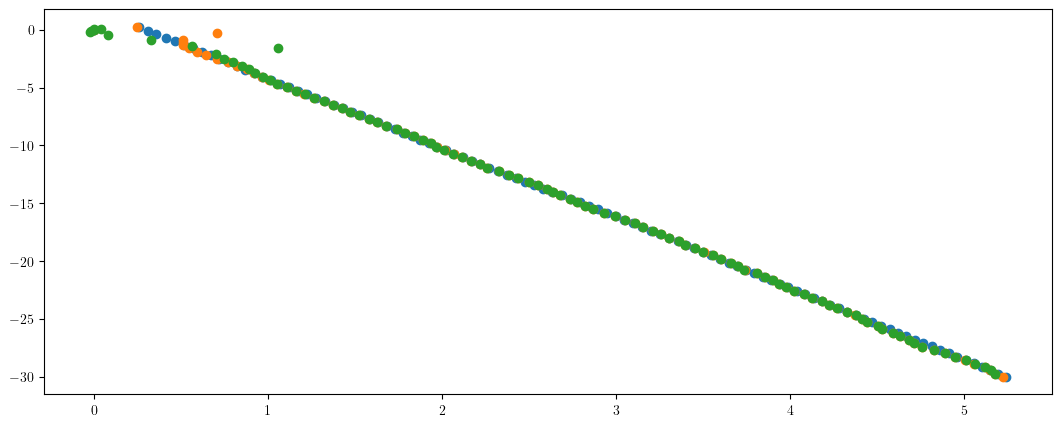

In [592]:
plt.scatter(avec, bvec)
plt.scatter(aEKF, bEKF)
plt.scatter(avec_hat, bvec_hat)

In [525]:
covy, np.linalg.inv(covy)

(array([[18.7781481 ,  1.58440071],
        [ 1.58440071,  0.49362077]]),
 array([[ 0.07303208, -0.23441493],
        [-0.23441493,  2.77826069]]))

In [544]:
w[ell]*xz[:, ell]

array([ 0.        ,  0.        , -0.12647807, -0.31269432])

In [538]:
scale

array([1.53985359])

In [523]:
Pp

array([[ 3.59739001,  0.96660886,  7.69571189,  3.49673181],
       [ 0.96660886,  0.31986487,  1.84590822,  0.83890982],
       [ 7.69571189,  1.84590822, 18.58869384,  8.6006846 ],
       [ 3.49673181,  0.83890982,  8.6006846 ,  4.23689098]])

In [524]:
Xp

array([[1.13210424, 0.34583562, 1.37516249, 0.55231862],
       [0.34583562, 0.31882632, 0.28542359, 0.13094178],
       [1.37516249, 0.28542359, 3.76045315, 1.57326013],
       [0.55231862, 0.13094178, 1.57326013, 1.19980912]])

In [478]:
wy[0]*(yt[:, 0]-y_hat).reshape(-1, 1)@((yt[:, 0]-y_hat).reshape(-1, 1).T)

array([[-0.02215957, -0.0193433 ],
       [-0.0193433 , -0.01688496]])

In [473]:
w[0]*((xz[:, 0]-xp[:, n]).reshape(-1, 1) @ (yt[:, 0]-y_hat).reshape(-1, 1).T)

array([[0.02289414, 0.01998452],
       [0.00550039, 0.00480134],
       [0.01163964, 0.01016035],
       [0.01675489, 0.01462551]])

In [520]:
(yt[:, 0]-y_hat), (yt[:, 0]-y_hat).T

(array([-0.53560922,  0.13898405]), array([-0.53560922,  0.13898405]))

In [529]:
xp_aux

array([-0.68274125, -0.16403068, -0.23274125, -0.61403068])

In [533]:
z

array([[ 0.        ,  0.59281207,  0.        ,  0.        ,  0.        ,
        -0.59281207,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.18746364,  0.        ,  0.        ,
         0.        , -0.18746364,  0.        ,  0.        ],
       [ 0.2       ,  0.2       ,  0.2       ,  0.79281207,  0.2       ,
         0.2       ,  0.2       , -0.39281207,  0.2       ],
       [-0.1       , -0.1       , -0.1       , -0.1       ,  0.08746364,
        -0.1       , -0.1       , -0.1       , -0.28746364]])

In [536]:
scipy.linalg.sqrtm(Pi_0)

array([[0.31622777, 0.        , 0.        , 0.        ],
       [0.        , 0.1       , 0.        , 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.        , 0.        , 0.1       ]])